<a href="https://colab.research.google.com/github/namgisung/project/blob/master/quantitative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

화학반응식을 입력하세요(_A+_B->_C):2A+5B->1C
제시된 자료를 숫자로 입력하세요(반응 전 A와 B의 양(1), 반응 전과 후 전체 양(2))1
A의 반응하기 전 양을 입력하세요:4
B의 반응하기 전 양을 입력하세요:5
몰비:  2 5 1
한계반응물:  B
반응 후 A의 양: 2.0
반응 후 B의 양: 0
반응 후 C의 양: 1.0
[4.0, 3.8000000000000003, 3.6, 3.4, 3.2, 3.0]
[0, 1, 2, 3, 4, 5]


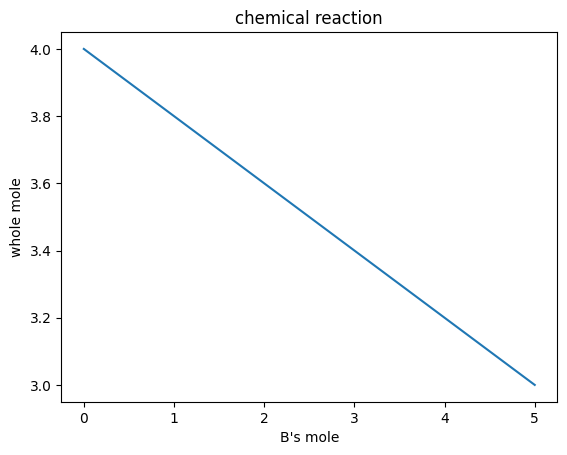

In [1]:
import matplotlib.pyplot as plt

#반응 전 A와 B의 양이 주어진 양적관계
def reaction(a_mole_ratio, b_mole_ratio, c_mole_ratio):
  #A의 반응하기전 몰수 입력받기
  a_mole = float(input("A의 반응하기 전 양을 입력하세요:"))
  b_mole = float(input("B의 반응하기 전 양을 입력하세요:"))
  cm = 0
  bing = []
  t = []
  total_calculate = 0
  limiting_reactant = ""
  after_a_mole = 0
  after_b_mole = 0
  i = 0

  #한계반응물 찾고 반응후 몰수 구하기()
  while i <= b_mole:
    if(a_mole / a_mole_ratio > i / b_mole_ratio):
      after_a_mole = a_mole - (i / b_mole_ratio) * a_mole_ratio
      after_b_mole = 0
      cm = (i / b_mole_ratio) * c_mole_ratio
      total_calculate = cm + after_a_mole
    elif(a_mole / a_mole_ratio < i / b_mole_ratio):
      after_b_mole = i - (a_mole / a_mole_ratio) * b_mole_ratio
      after_a_mole = 0
      cm = (a_mole / a_mole_ratio) *  c_mole_ratio
      total_calculate = cm + after_b_mole
    else:
      cm = (a_mole / a_mole_ratio) * c_mole_ratio
      after_a_mole = 0
      after_b_mole = 0
      total_calculate = cm

    if a_mole == 0:
      total_calculate = cm + 1
    elif b_mole == 0:
      total_calculate = cm + 1

    t.append(total_calculate)
    bing.append(i)
    i += 1

  if after_a_mole == 0 and after_b_mole > 0:
    limiting_reactant = "A"
  elif after_b_mole == 0 and after_a_mole > 0:
    limiting_reactant = "B"
  else:
    limiting_reactant = "A and B"
  print("몰비: ", a_mole_ratio, b_mole_ratio, c_mole_ratio)
  print("한계반응물: ", limiting_reactant)
  print("반응 후 A의 양:", after_a_mole)
  print("반응 후 B의 양:", after_b_mole)
  print("반응 후 C의 양:", cm)
  print(t)
  print(bing)


  # 그래프 그리기
  plt.plot(bing, t)

  # 그래프에 제목과 축 레이블 추가
  plt.title("chemical reaction")
  plt.xlabel("B's mole")
  plt.ylabel("whole mole")

  # 그래프 보여주기
  plt.show()

#반응 전과 후 전체 양(mol)으로 반응 후 C의 양 구하기
def total_whole_mole(a_mole_ratio,b_mole_ratio,c_mole_ratio):
  total_modulus_change = c_mole_ratio - (a_mole_ratio+b_mole_ratio)
  total_moles_before_reaction = float(input("반응 전 전체 양(mol):"))
  total_moles_after_reaction = float(input("반응 후 전체 양(mol):"))
  total_moles_change = total_moles_after_reaction - total_moles_before_reaction
  c_mole2 = c_mole_ratio * (total_moles_change / total_modulus_change)
  print("반응 후 C의 양:", c_mole2)

#화학반응식 입력받기
ce = input("화학반응식을 입력하세요(_A+_B->_C):")
q = float(input("제시된 자료를 숫자로 입력하세요(반응 전 A와 B의 양(1), 반응 전과 후 전체 양(2))"))

#화학반응식 개수비 찾기
re = ce.split("->")[0]
pr = ce.split("->")[1]
re1 = re.split("+")[0]
re2 = re.split("+")[1]
a_mole_ratio = int(re1.split("A")[0])
b_mole_ratio = int(re2.split("B")[0])
c_mole_ratio = int(pr.split("C")[0])

if q == 1:
  reaction(a_mole_ratio,b_mole_ratio,c_mole_ratio)
elif q ==2:
  total_whole_mole(a_mole_ratio,b_mole_ratio,c_mole_ratio)